# 3.Pytorch에서의 Deep learning

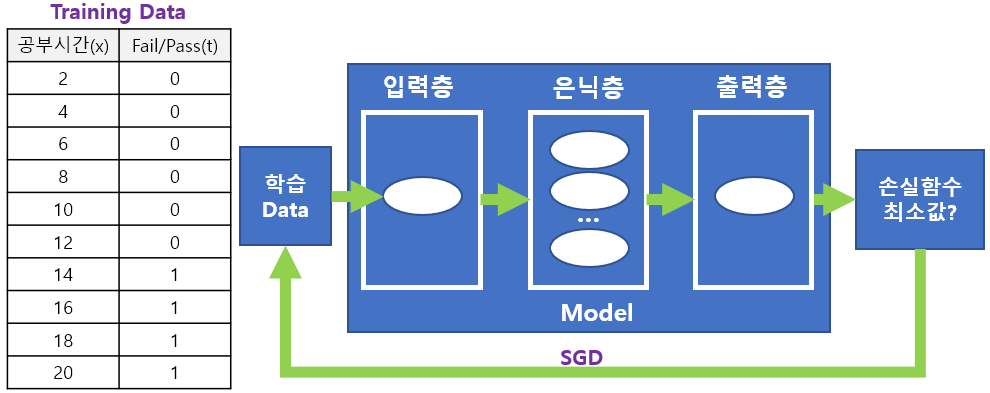

In [ ]:
import torch

x_train = torch.Tensor([2, 4, 6, 8, 10,
                        12, 14, 16, 18, 20]).view(10, 1)
y_train = torch.Tensor([0, 0, 0, 0, 0,
                        0, 1, 1 ,1 ,1]).view(10, 1) # (10 x 1) 로 reshape

print(x_train.shape, y_train.shape)

torch.Size([10, 1]) torch.Size([10, 1])


In [ ]:
import torch.nn as nn

class DeepLearningModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.deeplearning_stack = nn.Sequential(
        # 1개의입력 data에 대해 8개의 출력을 가지는 은닉층
        # 위 그림에서 입력층과 은닉층 사이를 표현하는 code
        nn.Linear(1, 8),
        # 8개의입력 data에 대해 1개의 출력을 가지는 출력층
        # 위 그림에서 은닉층과 출력층 사이를 표현하는 code
        nn.Linear(8, 1),
        # 출력층의 결과를 0~1 사이의 값으로 만드는 활성화 함수
        nn.Sigmoid()
    )

  def forward(self, x_data):
    return self.deeplearning_stack(x_data)

In [ ]:
deep_model = DeepLearningModel() # model instance 생성

# model parameter(Weight, Bias) 확인
for name, child in deep_model.named_children():
  for param in child.parameters():
    print("===============================")
    print(f'name = {name}')
    print(param)

name = deeplearning_stack
Parameter containing:
tensor([[0.4684],
        [0.2663],
        [0.8289],
        [0.6955],
        [0.8018],
        [0.4886],
        [0.0403],
        [0.7619]], requires_grad=True)
name = deeplearning_stack
Parameter containing:
tensor([-0.4443,  0.3795, -0.2425,  0.4023, -0.8622,  0.7442, -0.1889, -0.3122],
       requires_grad=True)
name = deeplearning_stack
Parameter containing:
tensor([[ 0.2848,  0.2672, -0.1250,  0.0638, -0.2974,  0.0386,  0.2769, -0.0788]],
       requires_grad=True)
name = deeplearning_stack
Parameter containing:
tensor([-0.1749], requires_grad=True)


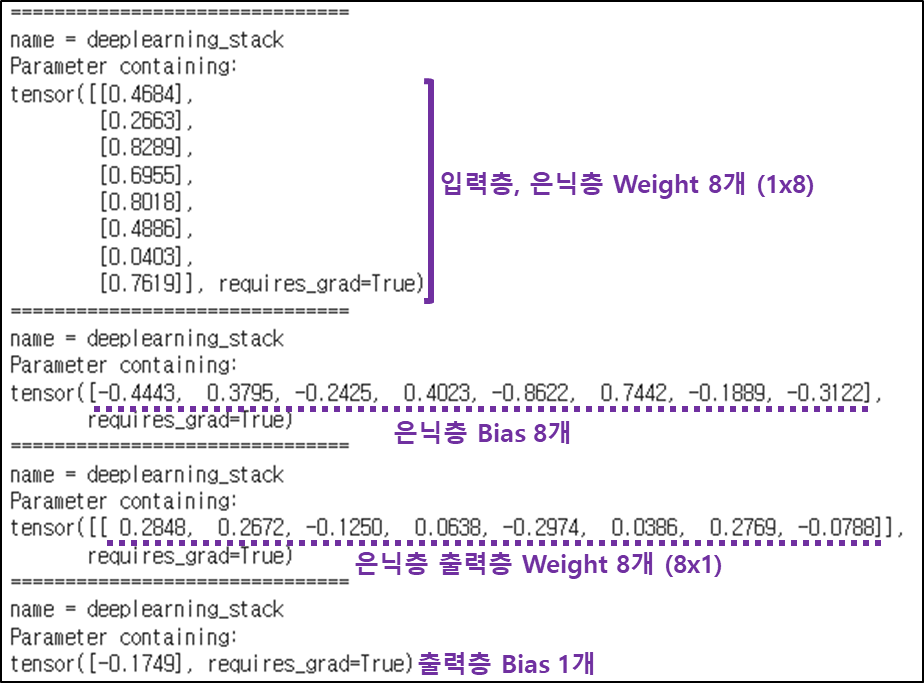

In [ ]:
from torchsummary import summary as summary
summary(deep_model, (len(x_train),1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 10, 8]              16
            Linear-2                [-1, 10, 1]               9
           Sigmoid-3                [-1, 10, 1]               0
Total params: 25
Trainable params: 25
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
criterion = nn.BCELoss()  # 이진분류이므로 손실함수는 Binary Cross Entropy인 BCELoss()
optimizer = torch.optim.SGD(deep_model.parameters(), lr=0.01) # optimizer는 SGD

In [ ]:
epochs = 5000
for epoch in range(epochs):
  # 입력 data에 대해 예측값 계산
  outputs = deep_model(x_train)

  # 예측값과 정답과의 오차(Error)인 손실함수 계산
  loss = criterion(outputs, y_train)

  # 역전파, model parameter(weight, bias)를 update하면서 최적화
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'epoch = {epoch}, loss = {loss.item()}')

epoch = 0, loss = 0.07328715920448303
epoch = 100, loss = 0.07220454514026642
epoch = 200, loss = 0.07115450501441956
epoch = 300, loss = 0.07013537734746933
epoch = 400, loss = 0.06914560496807098
epoch = 500, loss = 0.06818385422229767
epoch = 600, loss = 0.06724853068590164
epoch = 700, loss = 0.06633873283863068
epoch = 800, loss = 0.06545300781726837
epoch = 900, loss = 0.06459037959575653
epoch = 1000, loss = 0.06374979019165039
epoch = 1100, loss = 0.06293042004108429
epoch = 1200, loss = 0.062131207436323166
epoch = 1300, loss = 0.06135142594575882
epoch = 1400, loss = 0.06059013679623604
epoch = 1500, loss = 0.05984671041369438
epoch = 1600, loss = 0.059120405465364456
epoch = 1700, loss = 0.05841052532196045
epoch = 1800, loss = 0.057716477662324905
epoch = 1900, loss = 0.057037632912397385
epoch = 2000, loss = 0.05637357756495476
epoch = 2100, loss = 0.05572350695729256
epoch = 2200, loss = 0.05508716031908989
epoch = 2300, loss = 0.05446390062570572
epoch = 2400, loss = 0.0

In [ ]:
# 평가
deep_model.eval() # 평가 mode로 전환

test_data = torch.Tensor([0.5, 3.0, 3.5, 11.0, 13.0, 31.0]).view(6, 1)

prediction = deep_model(test_data) # 6개의 data에 대하여 예측 실행

# prediction이 0.5 보다 크면 실수 1.0 으로, 작으면 실수 0.0 으로 type casting
logical_value = (prediction > 0.5).float()

print(prediction)
print(f'logical_value = {logical_value}')

'''
tensor([[5.2704e-09],
        [2.4346e-07],
        [5.2401e-07],
        [4.9117e-02],  # 0.5, 3.0, 3.5, 11.0 에 대한 예측값
        [5.2575e-01],  # 13 에 대한 예측값, 약 0.525
        [1.0000e+00]], grad_fn=<SigmoidBackward0>) # 31 에 대한 예측값
logical_value = tensor([[0.],
        [0.],
        [0.],     # training data의 pattern 처럼
        [0.],     # 12 이하이면 0을 예측하고
        [1.],     # 14 이상이면 1을 예측한다.
        [1.]])    # 13 에 대해서는 약 52% 의 확률로 1을 예측
'''

tensor([[5.2704e-09],
        [2.4346e-07],
        [5.2401e-07],
        [4.9117e-02],
        [5.2575e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)
logical_value = tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.]])
